# Chapter 16 Exercises

In [1]:
# From book
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import tensorflow as tf
import gym

Use policy gradients to tackle OpenAI gym’s “BypedalWalker-v2”[sic].

Tried this, but the gym.make() for it fails because of some problem with box2d. Others have reported it working on Python 3.4, but not 3.5+. Need a fix, so going to move onto next exercise.

Use the DQN algorithm to train an agent to play Pong, the famous Atari game (Pong-v0 in the OpenAI gym). Beware: an individual observation is insufficient to tell the direction and speed of the ball.

In [3]:
env = gym.make("BipedalWalker-v2")

AttributeError: module 'Box2D._Box2D' has no attribute 'RAND_LIMIT'

In [3]:
env = gym.make("Pong-v0")

Tip from book:

"Games such as Pong or Breakout contain a moving ball whose direction and speed cannot be determined with a single observation, so they would require combining the last few observations into the environment’s state. One way to do that would be to create an image with one channel for each of the last few observations. Alternatively, we could merge the last few observations into a single channel image, for example by computing the max of these observations (after diming the older observations, so that the direction of time is clear on the final image)."

Let's take the latter option.

In [5]:
obs = env.reset()
obs.shape

(210, 160, 3)

In [6]:
env.action_space

Discrete(6)

In [10]:
# Modified from book

def preprocess_observation(obs):
    img = obs[1:176:2, ::2] # crop and downsize
    img = img.sum(axis=2) # to greyscale
    img = (img // 3 - 128).astype(np.int8) # normalize from -128 to 127
    return img.reshape(88, 80, 1)

def preprocess_observation2(obs):
    img = obs[34:194:2, ::2] # crop and downsize
    return np.mean(img, axis=2).reshape(80, 80) / 255.0

img = preprocess_observation2(obs)

<IPython.core.display.Javascript object>


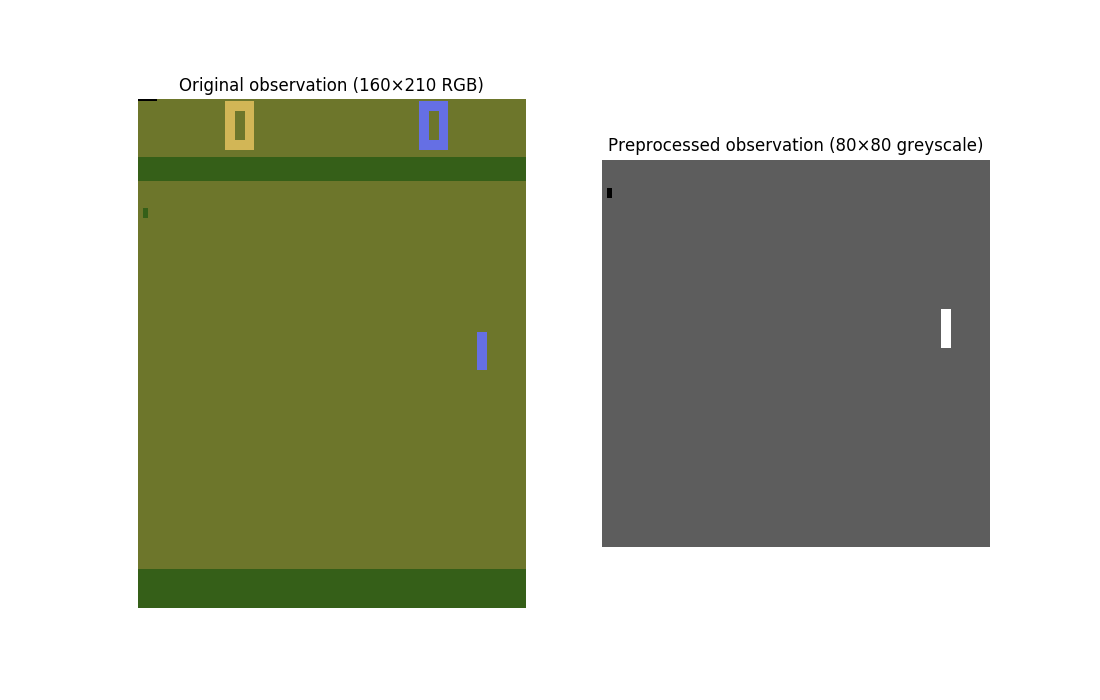

In [11]:
plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.title("Original observation (160×210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocessed observation (80×80 greyscale)")
plt.imshow(img.reshape(80, 80), interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()

In [27]:
# Modified from book

from collections import deque

def combine_observations_multichannel(preprocessed_observations):
    return np.array(preprocessed_observations).transpose([1, 2, 0])

def combine_observations_singlechannel(preprocessed_observations, dim_factor=0.5):
    dimmed_observations = [obs * dim_factor**index
                           for index, obs in enumerate(reversed(preprocessed_observations))]
    return np.max(np.array(dimmed_observations), axis=0)

n_observations_per_state = 3
preprocessed_observations = deque([], maxlen=n_observations_per_state)

obs = env.reset()
for step in range(10):
    obs, _, _, _ = env.step(1)
    preprocessed_observations.append(preprocess_observation2(obs))

<IPython.core.display.Javascript object>


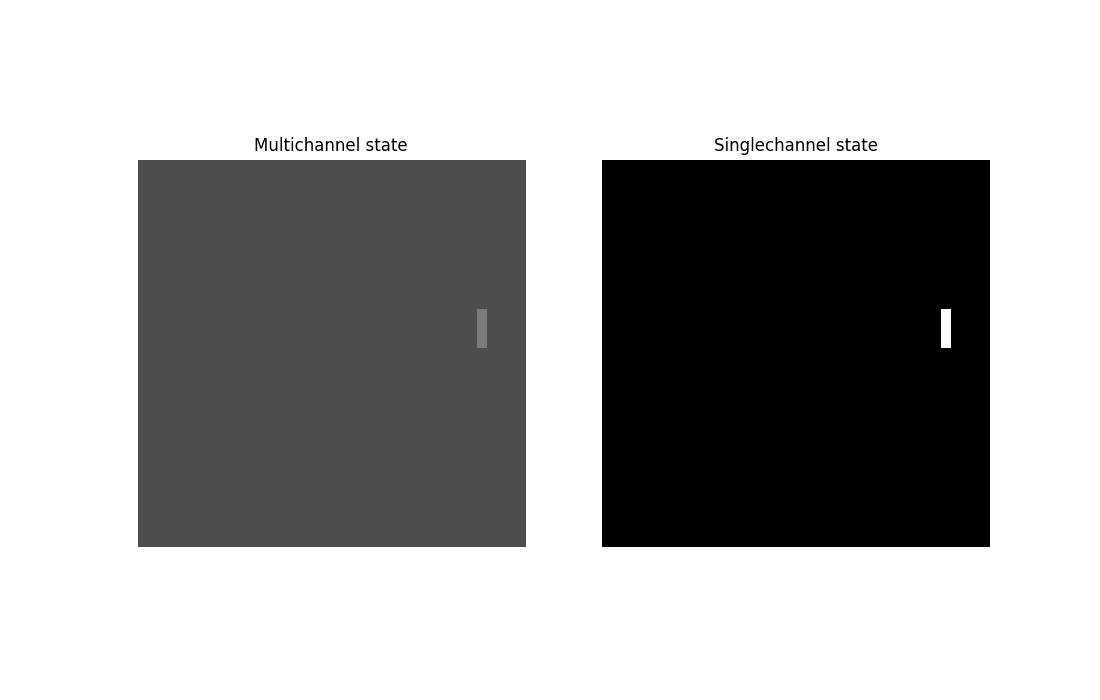

In [28]:
#From book
img1 = combine_observations_multichannel(preprocessed_observations)
img2 = combine_observations_singlechannel(preprocessed_observations)

plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.title("Multichannel state")
plt.imshow(img1, interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.title("Singlechannel state")
plt.imshow(img2, interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()